# **GRU Exercise**

## Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [5]:
data = pd.read_csv('traffic.csv')
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Data Exploration



In [8]:
data = data[['Vehicles']]


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

## Feature Engineering (if needed)



## Exploratory Data Analysis


In [9]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

## split into train and test sets

In [10]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [11]:
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

## Fitting The Model



In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1202/1202 [==============================] - 17s 10ms/step - loss: 0.0012 - val_loss: 9.3562e-04
Epoch 2/10
1202/1202 [==============================] - 11s 9ms/step - loss: 7.2445e-04 - val_loss: 0.0010
Epoch 3/10
1202/1202 [==============================] - 11s 9ms/step - loss: 6.7096e-04 - val_loss: 8.0728e-04
Epoch 4/10
1202/1202 [==============================] - 10s 8ms/step - loss: 6.2091e-04 - val_loss: 7.8192e-04
Epoch 5/10
1202/1202 [==============================] - 11s 9ms/step - loss: 5.9533e-04 - val_loss: 7.4422e-04
Epoch 6/10
1202/1202 [==============================] - 11s 9ms/step - loss: 5.7580e-04 - val_loss: 7.5110e-04
Epoch 7/10
1202/1202 [==============================] - 11s 9ms/step - loss: 5.5413e-04 - val_loss: 7.5525e-04
Epoch 8/10
1202/1202 [==============================] - 11s 9ms/step - loss: 5.4983e-04 - val_loss: 7.4568e-04
Epoch 9/10
1202/1202 [==============================] - 12s 10ms/step - loss: 5.4032e-04 - val_loss: 7.3367e-04
Epoch 1

## Make preductuion and evaluatuin matrix.

In [14]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

301/301 [==============================] - 2s 4ms/step


## Visualize the result

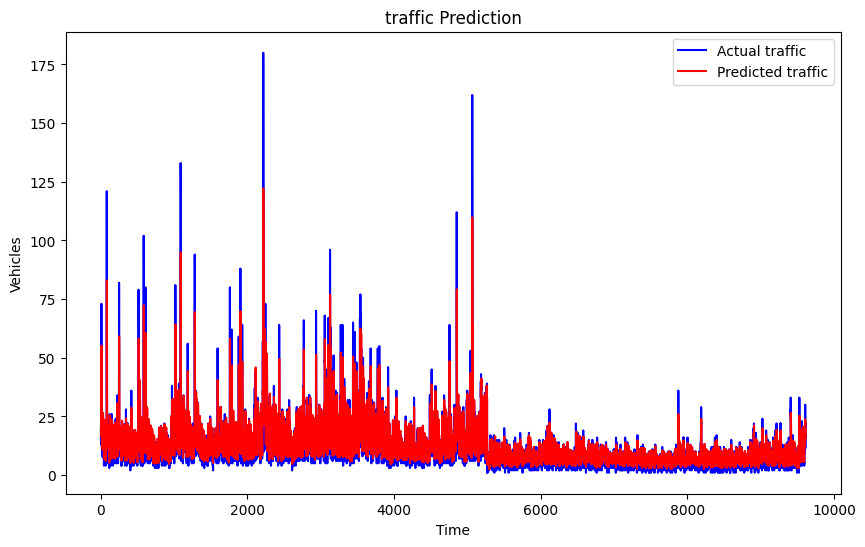

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual traffic')
plt.plot(predicted_stock_price, color='red', label='Predicted traffic')
plt.title('traffic Prediction')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()


# **Well done** :)